# Week 3 Ganesh Kale

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [20]:
from __future__ import print_function, division

import nsfg
import numpy as np
import pandas as pd

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [3]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [4]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [21]:
# column birthord value counts
preg.birthord.value_counts()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

In [11]:
# codebook has blank value so counted here as
preg.birthord.isna().sum()

4445

###### Compared with code book 
##### 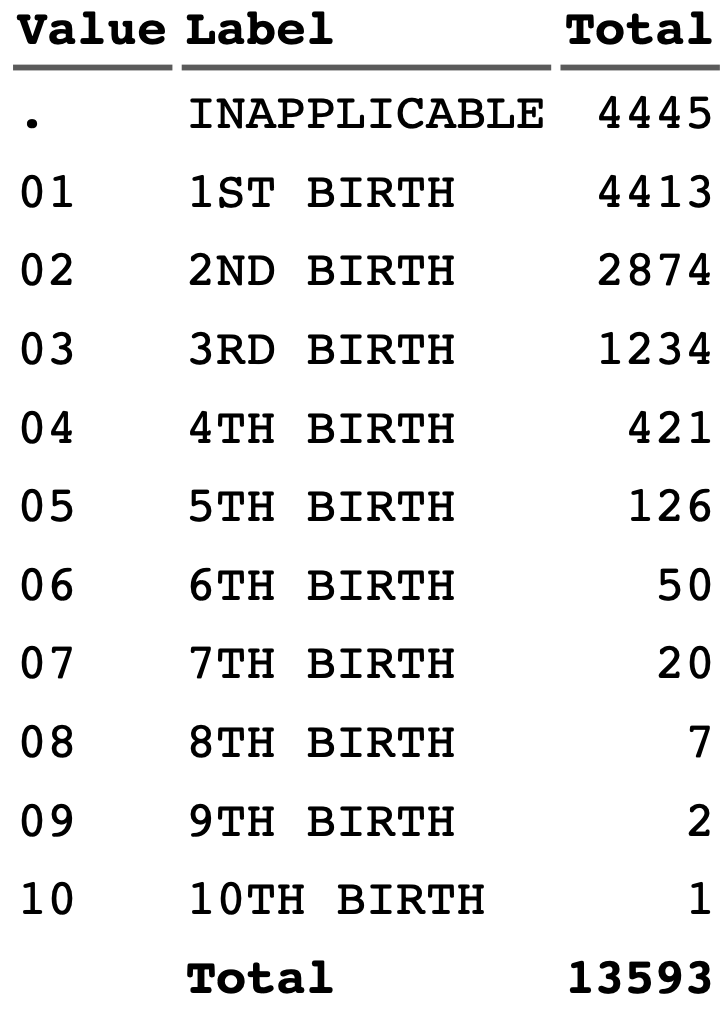


We can also use `isnull` to count the number of nans.

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

###### compared with prglngth codebook

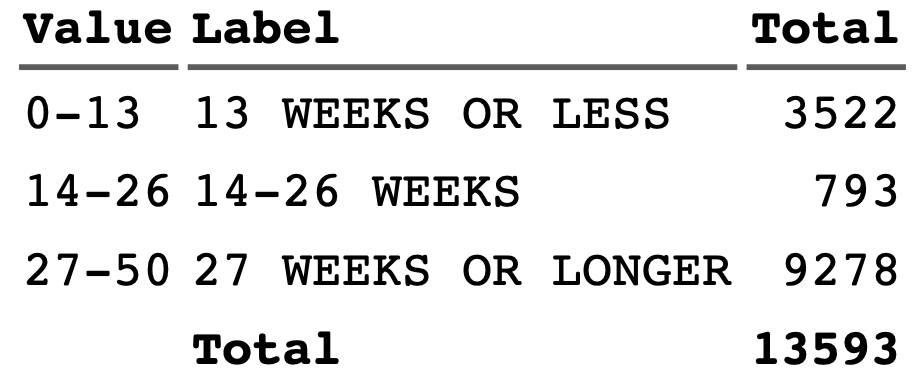

In [12]:
# calculated value counts for pglngth and sorted by index and compared wit codebook

preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [5]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [7]:
# created new column 'totalwgt_kg' for weight in kg

preg['totalwgt_kg'] = preg.totalwgt_lb * 0.453592
preg.totalwgt_kg.mean()

3.2956309433502984

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [8]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [9]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [10]:
# the youngest respondent is 15 year old and oldest is 44 year old

resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

How old is the respondent with `caseid` 1?

In [11]:
# respondent with caseid 1 is 44 year old

resp[resp.loc[:,'caseid']==1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [12]:
# the pregnancy lengths of respondent caseid 2298 are given below:

preg[preg.loc[:,'caseid']==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [13]:
# The birthweight of first baby born to respondent with caseid 5012 is - 6lb

preg[preg.loc[:,'caseid']==5012].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

### Exercise 2.4

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [14]:
# function to calculate cohens effect
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [15]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [16]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [17]:
# mean of total weight of first babies

firsts.totalwgt_lb.mean()

7.201094430437772

In [18]:
# difference of both means -

firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()

-0.12476118453549034

In [21]:
# Cohensd of total weight of first and other babies

CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.08867292707260174

Based on the total weight mean of first babies which is 7.201094430437772 and other babies weight is 7.325855614973262
So we can say that first babies are slighlty lighter that others, the differene is -0.12476118453549034 lb which is very small number, basically it is around 2 Ounce.
which shows us that first babies are lighter by 2 ounce compared to other babies. 2 ounce is very small number compared to weight in pounds.

When we see the Cohens Effect size , it is -0.08867292707260174 std unit
This is very smaller than 0.2 so we can say there is negligible effect.

After all, based on mean difference and cohens effect size we can say that first babies and others babies does not have difference is weight. They both having same birth weight.

When we compare this to pregnancy length, I think there is no much difference,  weight of first babies and first preg length have not much difference with other babies  weigtht and others preg length. 
The mean difference and cohens effect size indicates there is not much difference and can be negligible.

### Exercise 2.1

This exercise has two parts –
1. Which summary statistics would you use if you wanted to get on evening news.
Mean pregnancy lengths for first and other babies are 38.601 and 38.523 resp.
Lets’ answers this, the news channel focus is on breaking news , so when summary is presented, I would use mean to differentiate between pregnancy lengths of first babies and others. This term is easy to understand to common public and when compared with each we can tell them the first babies pregnancy length is bigger than other babies (even it is of few hours but to just for news purpose), So first babies do arrive late than other babies.
2. Second part is to reassure anxious patient. 
In this case that anxious patient must be pregnant woman, so we can use the mean as summary stat and show the difference is very negligible, it is of few hours, actual it is of 13 hours so does not make any big difference so first babies do take same pregnancy length as other babies.


#### The Straight Dope

From the historgram shown in the book by comparing pregnancy length of first and others, we can see mode is at 39 that means first and other babies born at same week so not late when compared to other babies. Also when mean of pregnancy length is compared of first and others are 38.601 and 38.523 respectively, so not much it comes around 13 hrs. When compared the difference of these two groups using cohens effect, there also we see not much difference and it is 0.029 std. Based on this we cany say first babies do arrive at same time as others not late.